In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [12]:
data = pd.read_csv('./data/fresh_data.csv')
data = data.drop(['pls_ampl', 'frequency', 'Unnamed: 0'], axis=1)

X_obj = data.drop(['label'], axis=1)
y_label = data['label']
y_label.columns = ['label']
#print(data.columns.values)
#print(X_obj.head(10))
X_train, X_test, y_train, y_test = train_test_split(
  X_obj, y_label, random_state=104, test_size=0.5, shuffle=True)
print(data)

     cone_angl  axial_speed  axial_speed_1  axial_speed_2  axial_speed_3   
0            4     4.305386       3.953513       3.681360       2.990355  \
1            4     4.229882       4.203703       3.595205       3.110245   
2            4     4.215617       3.952247       3.652260       2.792792   
3            4     3.666300       3.340240       3.011276       2.257453   
4            4     2.517470       2.593826       2.111919       1.452982   
..         ...          ...            ...            ...            ...   
701         15    -3.767745      -4.424052      -4.409883      -5.107167   
702         15    -3.631619      -4.129487      -4.237868      -4.860482   
703         15    -3.326155      -3.994757      -4.398435      -5.227015   
704         15    -3.574381      -3.716638      -4.268252      -4.736986   
705         15    -3.380910      -3.685161      -4.324246      -4.806483   

     axial_speed_4  axial_speed_5  axial_speed_6  axial_speed_7   
0         2.247855  

In [13]:
# Stsndartisation
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [14]:
# RF model
rfc = RandomForestClassifier(n_estimators = 100, max_depth=20, max_features=4)
rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

1.0

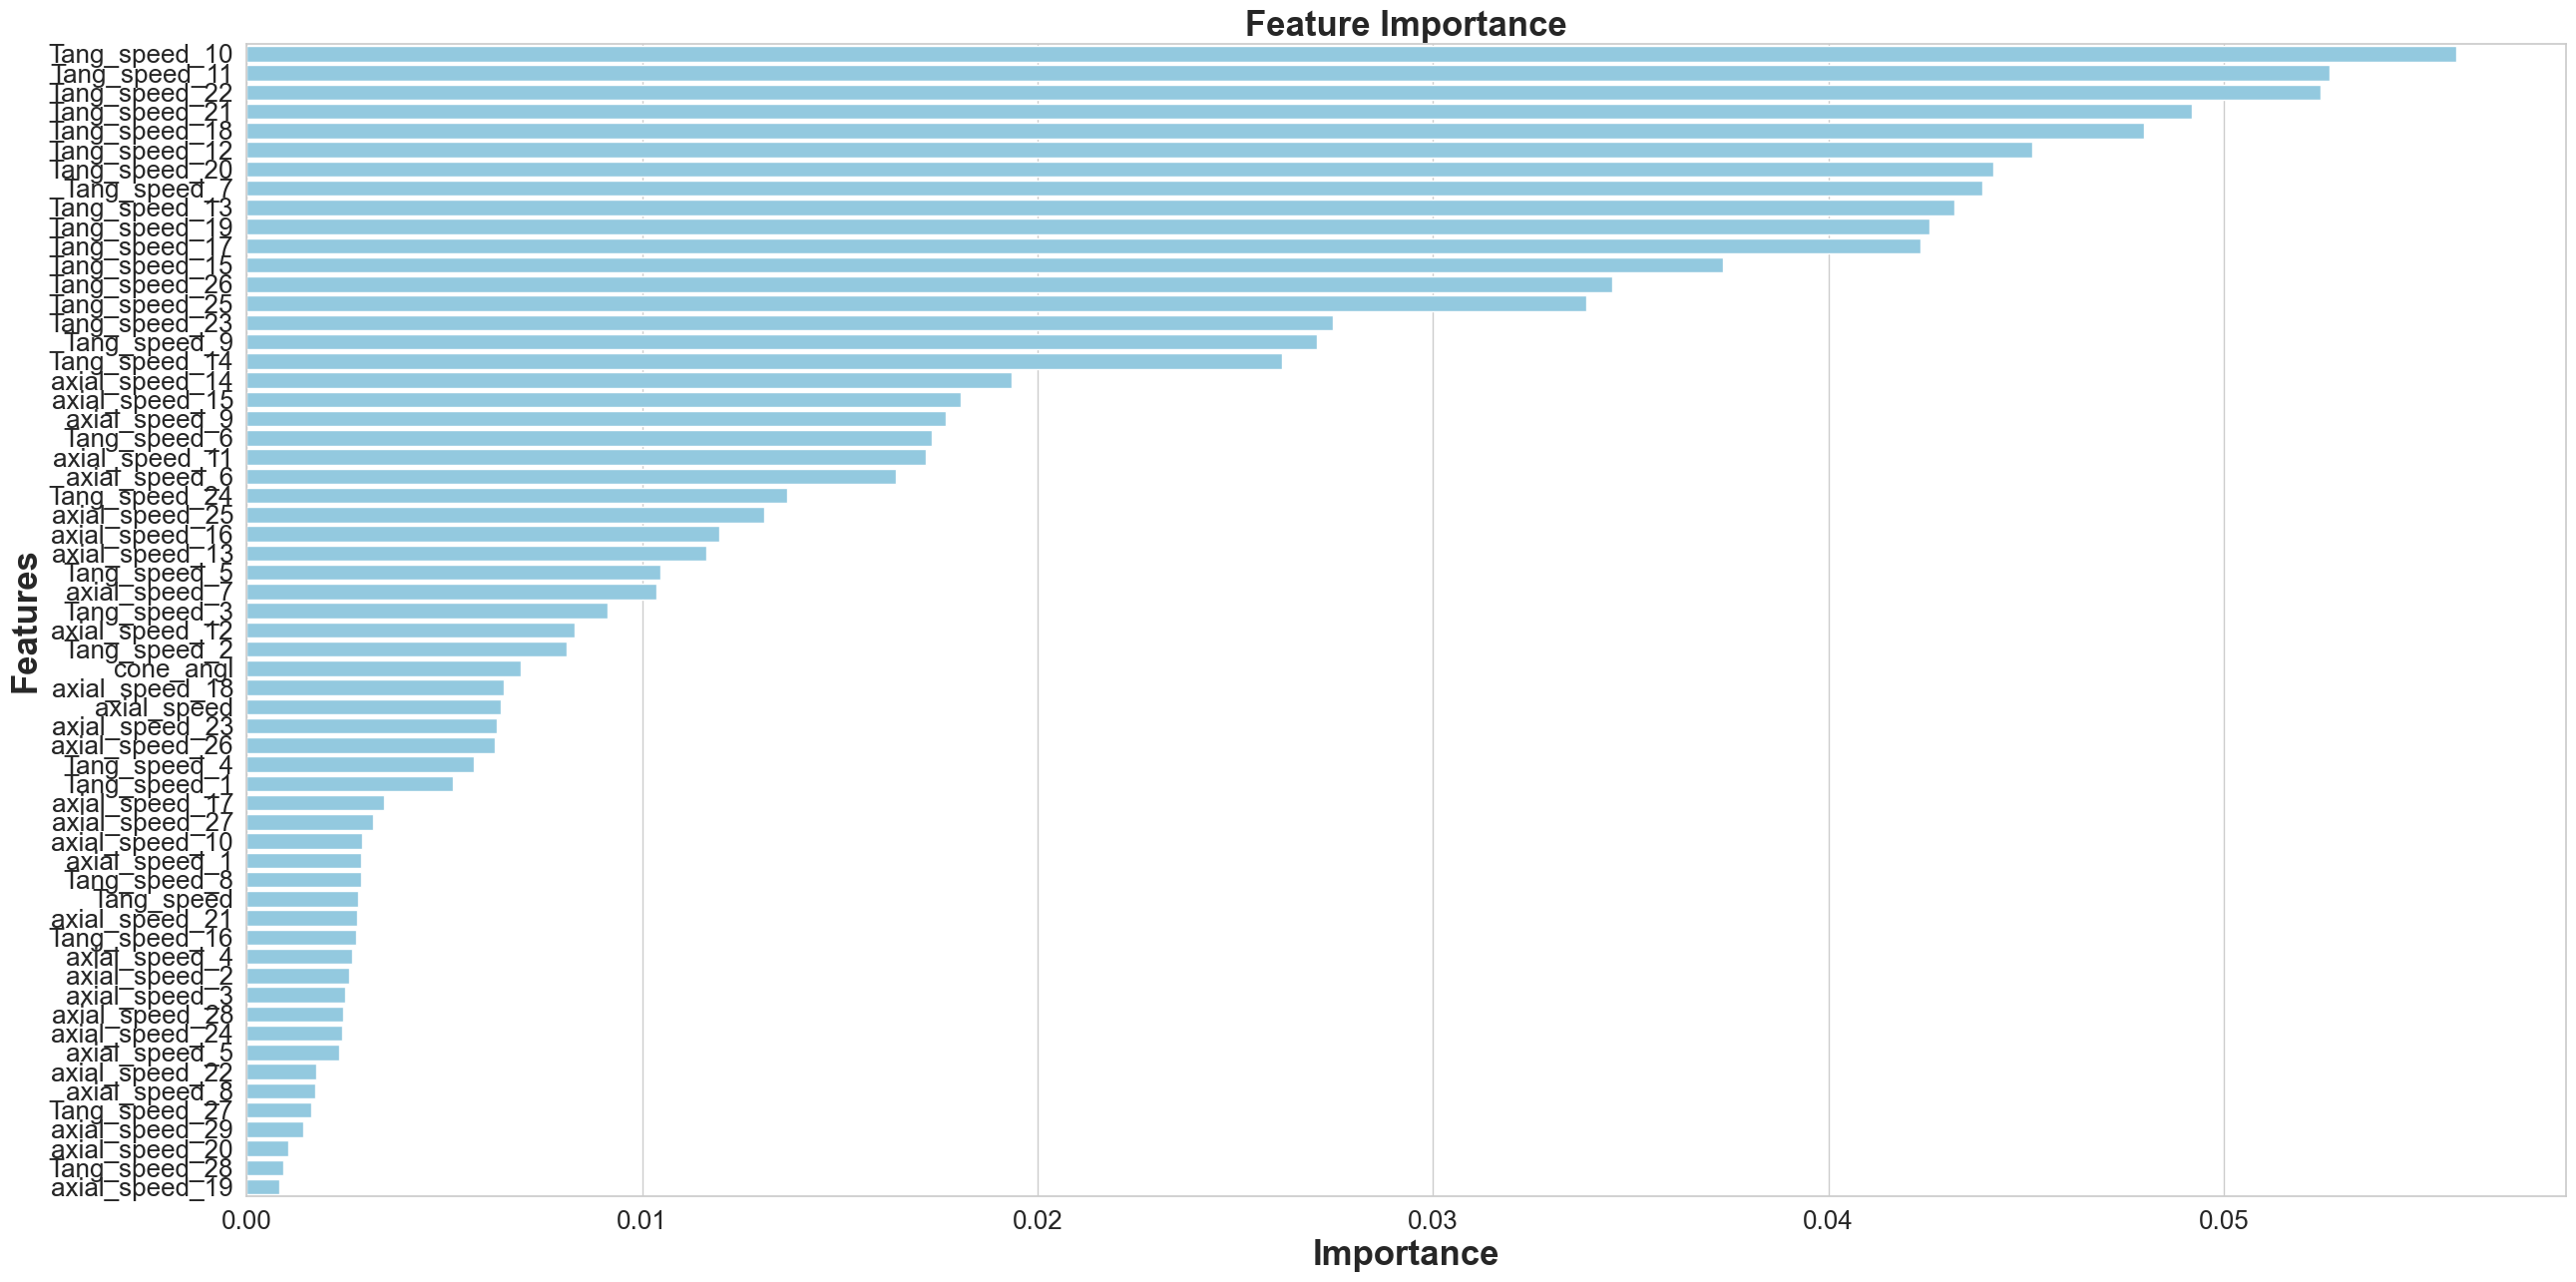

None

,Features,Gini-Importance
0,Tang_speed_10,0.055866
1,Tang_speed_11,0.052663
2,Tang_speed_22,0.052436
3,Tang_speed_21,0.049186
4,Tang_speed_18,0.047993
5,Tang_speed_12,0.045158
6,Tang_speed_20,0.044169
7,Tang_speed_7,0.043897
8,Tang_speed_13,0.043178
9,Tang_speed_19,0.042544


In [15]:
feats = {}
for feature, importance in zip(data.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [16]:
#clf = RandomForestClassifier(n_estimators=100)
#clf.fit(X_train,y_train)
#feature_imp = pd.Series(clf.feature_importances_,index=X_obj.feature_names).sort_values(ascending=False)
#print(feature_imp)

In [17]:
# Prediction of rfc model
y_pred = rfc.predict(X_test)

conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
display(conf_matrix_baseline)
display('accuracy = ', accuracy_score(y_test, y_pred))
display('recall = ', recall_score(y_test, y_pred))
display('precision = ', precision_score(y_test, y_pred))


,predicted 0,predicted 1
actual 0,102,9
actual 1,7,235


'accuracy = '

0.9546742209631728

'recall = '

0.9710743801652892

'precision = '

0.9631147540983607

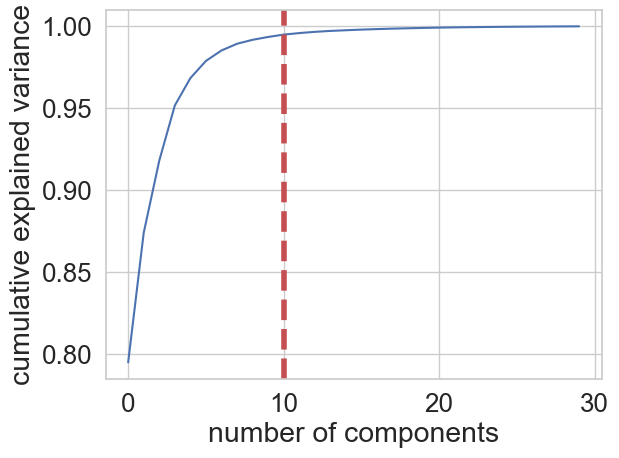

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.794684,0.794684
1,0.873680,0.078996
2,0.917701,0.044021
3,0.951323,0.033621
4,0.968012,0.016690
5,0.978496,0.010484
6,0.984878,0.006381
7,0.988950,0.004072
8,0.991383,0.002433
9,0.993120,0.001737


In [18]:
# Let's use full components method to know the most important
pca_test = PCA(n_components=30)
pca_test.fit(X_train)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [19]:
pca = PCA(n_components=10)
pca.fit(X_train)
X_train_scaled_pca = pca.transform(X_train)
X_test_scaled_pca = pca.transform(X_test)
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_, columns=list(X_obj.columns.values), index=pca_dims)
pca_test_df.head(10).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9
cone_angl,-0.008185,0.159043,-0.120307,0.316296,0.574006,0.684658,-0.049101,-0.197703,-0.062098,0.009043
axial_speed,-0.112743,-0.201180,0.235015,0.089827,0.088331,-0.117819,-0.010619,-0.159993,-0.156425,0.271133
axial_speed_1,-0.115101,-0.196769,0.231077,0.080335,0.085148,-0.105494,-0.020719,-0.154630,-0.131423,0.197722
axial_speed_2,-0.117966,-0.188224,0.227119,0.067856,0.088653,-0.086556,-0.032053,-0.144536,-0.102279,0.112801
axial_speed_3,-0.120686,-0.177371,0.224657,0.050441,0.085737,-0.067678,-0.046336,-0.135101,-0.061830,0.032434
axial_speed_4,-0.123776,-0.161734,0.220460,0.035360,0.081611,-0.040602,-0.042357,-0.111092,-0.022045,-0.046098
axial_speed_5,-0.127195,-0.144458,0.209866,0.021899,0.076973,-0.018468,-0.043091,-0.070218,0.009823,-0.110645
axial_speed_6,-0.130629,-0.123135,0.198070,0.011176,0.064465,0.007724,-0.036902,-0.025436,0.041241,-0.150872
axial_speed_7,-0.133657,-0.101839,0.181454,-0.002799,0.056212,0.032550,-0.031100,0.026809,0.078179,-0.195657
axial_speed_8,-0.136237,-0.078260,0.165163,-0.012173,0.045040,0.048832,-0.016116,0.068874,0.086378,-0.207789


In [20]:
# Write pca results in csv file
pca_test_df.to_csv('./data/pca_table.csv')